# Music Recommendation System

- **Nama:** Rafi Ananda Subekti
- **Email:** rafiasubekti@gmail.com
- **ID Dicoding:** MC009D5Y0612

# Domain Proyek
Proyek ini berfokus pada domain musik digital, khususnya analisis data yang berasal dari platform streaming Spotify, salah satu layanan musik terbesar dan paling populer di dunia saat ini. Dengan jutaan lagu yang tersedia, Spotify menyediakan beragam informasi mengenai setiap lagu, termasuk fitur audio yang menggambarkan karakteristik musik secara detail, serta data popularitas yang mencerminkan seberapa sering lagu tersebut diputar oleh pengguna. Proyek ini bertujuan untuk menggali dan memahami berbagai aspek tersebut agar dapat memperoleh wawasan mendalam tentang tren musik dan preferensi pendengar secara global.

Fokus utama analisis adalah pada karakteristik lagu yang diwakili oleh fitur-fitur seperti danceability, energy, valence, acousticness, dan tempo. Fitur-fitur ini memberikan gambaran objektif tentang sifat musikal suatu lagu yang dapat mempengaruhi bagaimana lagu tersebut diterima oleh pendengar. Selain itu, proyek ini juga mengevaluasi popularitas lagu di berbagai playlist dan genre, yang membantu dalam memahami pola konsumsi musik berdasarkan preferensi genre dan konteks playlist tertentu. Dengan demikian, proyek ini tidak hanya mengidentifikasi lagu-lagu populer, tetapi juga mengeksplorasi hubungan antara fitur audio dan popularitas.

# Business Understanding

## Problem Statements

Rumusan masalah dari masalah latar belakang diatas adalah:
1. Apa saja top 10 Lagu dari Playlist "Global Top 50 | 2020 Hits"?
2. Apa saja 5 Genre Lagu Teratas dengan Rata-rata memiliki Popularitas Tertinggi?
3. Apakah ada korelasi Korelasi antara Energy dan Popularitas Lagu?

## GOALS

Berdasarkan problem statements, berikut tujuan yang ingin dicapai pada proyek ini.
1. Mengidentifikasi 10 lagu dengan popularitas tertinggi dalam playlist "Global Top 50 | 2020 Hits" guna memahami lagu-lagu yang paling diminati secara global pada tahun 2020.
2. Menentukan 5 genre dengan rata-rata popularitas tertinggi untuk mengetahui preferensi pendengar terhadap genre tertentu.
3. Menganalisis hubungan antara tingkat energi lagu dan popularitas untuk mengetahui apakah lagu yang lebih energik cenderung lebih populer.

## Solution Statements


1. Data akan difilter berdasarkan nama playlist, lalu diurutkan berdasarkan nilai popularitas lagu secara menurun, dan diambil 10 lagu teratas sebagai hasil akhir.
2. Data akan difilter berdasarkan nama playlist, lalu diurutkan berdasarkan nilai popularitas lagu secara menurun, dan diambil 10 lagu teratas sebagai hasil akhir.
3. Menghitung koefisien korelasi Pearson antara kolom energy dan track_popularity, disertai dengan visualisasi scatter plot dan garis regresi untuk memperkuat interpretasi hubungan antara kedua variabel tersebut.



# Data Understanding

Data Understanding adalah tahap awal dalam proses analisis data yang berfungsi untuk mengenal dan memahami data secara menyeluruh. Pada tahap ini, kita memeriksa struktur data, jenis informasi yang terkandung, serta kualitas data yang ada, seperti kelengkapan dan konsistensi.

## Mengimport Library


Sebelum memulai analisis data, langkah pertama yang perlu dilakukan adalah mengimpor library atau pustaka yang diperlukan untuk membantu proses pengolahan, visualisasi, dan analisis data.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

Data Loading merupakan tahap di mana data diambil atau dimasukkan dari sumber luar ke dalam lingkungan kerja agar dapat dilakukan pemrosesan dan analisis lebih lanjut.

In [3]:
#!/bin/bash
!curl -L -o music.zip\
  "https://www.kaggle.com/api/v1/datasets/download/joebeachcapital/30000-spotify-songs"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 3081k  100 3081k    0     0  2954k      0  0:00:01  0:00:01 --:--:-- 2954k


In [4]:
!unzip music.zip -d music

Archive:  music.zip
  inflating: music/readme.md         
  inflating: music/spotify_songs.csv  


In [5]:
df = pd.read_csv("/content/music/spotify_songs.csv")
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


**Insight:**
- Pada tabel diatas dapat dilihat bahwa terdapat 23 kolom
- Pada tabel diatas juga terdapat 32.833 data

## Deskripsi Variabel

In [6]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne


| **Kolom**                    | **Tipe Data** | **Deskripsi** |
|-----------------------------|---------------|---------------|
| `track_id`                  | object        | ID unik untuk setiap lagu. Digunakan sebagai pengenal utama. |
| `track_name`                | object        | Nama atau judul lagu. |
| `track_artist`              | object        | Nama artis atau penyanyi dari lagu. |
| `track_popularity`          | int64         | Skor popularitas (0–100) berdasarkan metrik Spotify seperti jumlah pemutaran. |
| `track_album_id`            | object        | ID unik dari album tempat lagu berasal. |
| `track_album_name`          | object        | Nama album dari lagu. |
| `track_album_release_date` | object        | Tanggal rilis album dalam format string (YYYY-MM-DD). |
| `playlist_name`             | object        | Nama playlist yang memuat lagu tersebut. |
| `playlist_id`               | object        | ID unik dari playlist. |
| `playlist_genre`            | object        | Genre utama playlist, seperti pop, rock, hip-hop. |
| `playlist_subgenre`         | object        | Subgenre dari playlist, lebih spesifik dari genre utama. |
| `danceability`              | float64       | Seberapa cocok lagu untuk menari (0–1). |
| `energy`                    | float64       | Tingkat energi dan intensitas lagu (0–1). |
| `key`                       | int64         | Nada dasar lagu dalam angka 0–11 (C sampai B). |
| `loudness`                  | float64       | Volume rata-rata lagu dalam desibel (dB), biasanya negatif. |
| `mode`                      | int64         | Tangga nada lagu: 1 = mayor, 0 = minor. |
| `speechiness`              | float64       | Proporsi unsur ucapan (0–1); tinggi jika banyak spoken word/rap. |
| `acousticness`             | float64       | Probabilitas lagu bersifat akustik (0–1). |
| `instrumentalness`         | float64       | Probabilitas lagu tanpa vokal (0–1). |
| `liveness`                 | float64       | Probabilitas lagu direkam live (0–1). |
| `valence`                  | float64       | Suasana emosional lagu (0 = sedih, 1 = ceria). |
| `tempo`                    | float64       | Tempo lagu dalam BPM (beats per minute). |
| `duration_ms`              | int64         | Durasi lagu dalam milidetik. Contoh: 240000 = 4 menit. |


In [8]:
df.shape

(32833, 23)

## Deskripsi Data

In [9]:
df_filtered = pd.DataFrame(df)

In [10]:
df_filtered.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


Fungsi describe() digunakan untuk menampilkan ringkasan statistik dari setiap kolom dalam dataset, yang mencakup:

- Count menunjukkan jumlah data yang tersedia pada masing-masing kolom.
- Mean menyatakan nilai rata-rata dari data.
- Std adalah singkatan dari standar deviasi, yang menggambarkan sebaran atau variasi data
- Min menunjukkan nilai terkecil pada kolom tersebut.
- 25% adalah nilai kuartil pertama, yang berarti 25% data berada di bawah angka ini.
- 50% adalah kuartil kedua atau median, yaitu nilai tengah dari data.
- 75% merupakan kuartil ketiga, artinya 75% data berada di bawah nilai ini.
- Max menunjukkan nilai tertinggi dalam kolom tersebut.


| **Kolom**             | **Deskripsi** |
|----------------------|---------------|
| **`track_popularity`** | lagu berkisar dari 0 hingga 100, yang dihitung berdasarkan aktivitas pengguna seperti streaming dan penyimpanan lagu. Nilai rata-ratanya adalah sekitar 42,477 di mana semakin tinggi skornya, semakin populer lagu tersebut. |
| **`danceability`**     | Kolom yang menunjukkan seberapa cocok sebuah lagu untuk berdansa. Skala nilainya antara 0.0 sampai 1.0, dengan nilai rata-rata sekitar 0.655. Lagu dengan nilai danceability tinggi biasanya memiliki beat, tempo, dan ritme yang membuatnya mudah untuk bergerak dan menari. |
| **`energy`**           | Kolom yang mengukur tingkat intensitas dan semangat lagu, juga pada skala 0.0 sampai 1.0, dengan rata-rata sekitar 0.699. Lagu yang memiliki energy tinggi terdengar cepat, keras, dan penuh aktivitas, memberikan kesan semangat yang kuat. |
| **`key`**              | Nada dasar lagu yang berupa angka antara 0 sampai 11, di mana 0 mewakili nada C dan 11 mewakili nada B. Rata-rata nilai key yang ditemukan adalah sekitar 5,374. |
| **`loudness`**         | Kolom yang menjelaskan tentang volume rata-rata lagu diukur dalam desibel (dB), biasanya bernilai negatif karena merupakan tingkat suara relatif. Nilai loudness terendah adalah sekitar -46.45 dB dan tertinggi 1.28 dB, dengan rata-rata sekitar -6.72 dB. Semakin mendekati 0 dB, lagu terdengar semakin keras. |
| **`mode`**             | Kolom yang mengindikasikan jenis tangga nada lagu, yaitu mayor atau minor. Mode bernilai 1 menunjukkan lagu dengan tangga nada mayor yang ceria, sedangkan 0 menunjukkan tangga nada minor yang cenderung suram atau murung. Secara rata-rata, lebih banyak lagu yang menggunakan mode mayor. |
| **`speechiness`**      | Kolom untuk mengukur proporsi unsur ucapan dalam lagu, dengan skala dari 0.0 hingga 1.0 dan rata-rata sekitar 0.107. Nilai tinggi pada fitur ini biasanya menunjukkan lagu dengan banyak kata, seperti rap atau spoken word.. |
| **`acousticness`**     | Probabilitas lagu bersifat akustik (tanpa elemen elektronik). Memiliki nilai antara 0.0 sampai 1.0, dengan rata-rata 0.175. Nilai mendekati 1 berarti lagu sangat akustik. |
| **`instrumentalness`** | Menunjukkan kemungkinan lagu tanpa vokal manusia (instrumental). Dengan skala 0.0 hingga 1.0 dan rata-rata 0.084, nilai tinggi berarti lagu tersebut cenderung instrumental. |
| **`liveness`**         | Mengindikasikan apakah sebuah lagu direkam secara live, di hadapan penonton. Skala nilainya 0.0 sampai 1.0, dengan rata-rata sekitar 0.19. Nilai di atas 0.8 menandakan kemungkinan besar lagu tersebut merupakan rekaman live.|
| **`valence`**          | Mengukur suasana emosional lagu dari 0 (sedih) sampai 1 (ceria dan positif). Rata-rata valence adalah sekitar 0.51, yang berarti lagu-lagu cenderung memiliki keseimbangan antara suasana sedih dan ceria. |
| **`tempo`**            | Mengacu pada kecepatan lagu dalam beats per minute (BPM), dengan rentang dari 0 sampai sekitar 239 BPM dan rata-rata 120,88 BPM. Misalnya, 120 BPM dianggap sebagai tempo sedang. |
| **`duration_ms`**      | Menunjukkan durasi lagu dalam milidetik, dengan nilai terkecil sekitar 4000 ms (4 detik) dan terbesar sekitar 517810 ms (lebih dari 8 menit). Rata-rata durasi lagu adalah sekitar 225.800 ms, atau sekitar 3 menit 46 detik. |



## Exploratory Data Analysis (EDA)

### Analisis Berdasarkan Top 10 Lagu Terpopuler dari Playlist "Global Top 50 | 2020 Hits"

                                       track_name    track_artist  \
20091                                Dance Monkey     Tones and I   
20092                                     ROXANNE  Arizona Zervas   
20109                                     bad guy   Billie Eilish   
20093                                     No Idea     Don Toliver   
20097                         Futsal Shuffle 2020    Lil Uzi Vert   
20095           10,000 Hours (with Justin Bieber)      Dan + Shay   
20122                                    Suicidal       YNW Melly   
20094  Good as Hell (feat. Ariana Grande) - Remix           Lizzo   
20096       Own It (feat. Ed Sheeran & Burna Boy)         Stormzy   
20124                            Sweet but Psycho         Ava Max   

       track_popularity              playlist_name  
20091               100  Global Top 50 | 2020 Hits  
20092                99  Global Top 50 | 2020 Hits  
20109                95  Global Top 50 | 2020 Hits  
20093                92  Glo

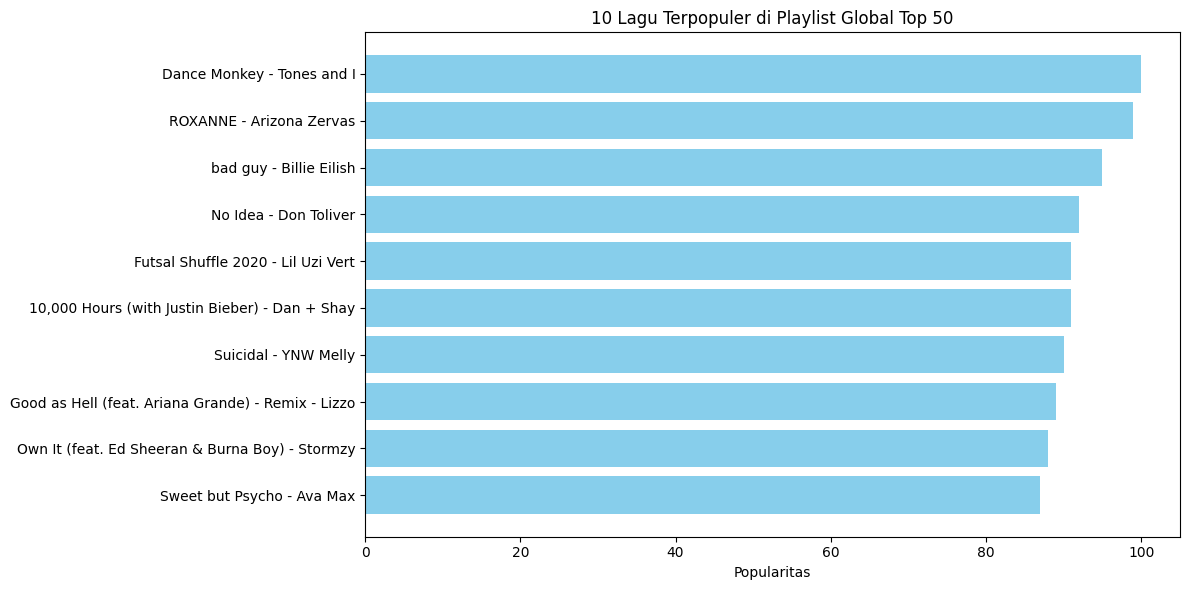

In [11]:
global_top_50 = df[df["playlist_name"].str.contains("Global Top 50", case=False, na=False)]

# Urutkan berdasarkan popularitas dan ambil 10 teratas
top_10_global = global_top_50.sort_values(by="track_popularity", ascending=False).head(10)

# Tampilkan hasil
print(top_10_global[["track_name", "track_artist", "track_popularity", "playlist_name"]])

plt.figure(figsize=(12, 6))
plt.barh(
    top_10_global["track_name"] + " - " + top_10_global["track_artist"],
    top_10_global["track_popularity"],
    color="skyblue"
)
plt.xlabel("Popularitas")
plt.title("10 Lagu Terpopuler di Playlist Global Top 50")
plt.gca().invert_yaxis()  # Lagu paling populer di atas
plt.tight_layout()
plt.show()

**Insight** :
- Dari output diatas kita bisa lihat 10 Lagu Terpopuler di Playlist Global Top 50 | 2020 Hits adalah :    
  -  Dance Monkey
  - ROXANNE  
  -  bad guy
  - No Idea
  - Futsal Shuffle 2020
  - 10,000 Hours (with Justin Bieber)
  - Suicidal  
  - Good as Hell (feat. Ariana Grande) - Remix
  -  Own It (feat. Ed Sheeran & Burna Boy)
  - Sweet but Psycho           
- Lagu “Dance Monkey” oleh Tones and I memiliki track_popularity tertinggi yaitu 100, menunjukkan bahwa lagu ini sangat populer secara global pada tahun 2020.
- Pada peringkat 1 dan 2 yaitu Dance Monkey - Tones and I dan Roxanne - Arizona Zervas memiliki beda selisih yang sedikit beda 1 nilai yaitu 100 dan 99.
- Popularitas lagu-lagu dalam daftar ini tidak menunjukkan perbedaan yang signifikan, dengan rentang skor antara 87 hingga 100. Hal ini mencerminkan bahwa persaingan antar lagu sangat ketat, di mana setiap track memiliki performa yang hampir setara dalam hal jumlah pemutaran dan tingkat keterlibatan pendengar. Skor popularitas yang tinggi secara konsisten juga menunjukkan bahwa lagu-lagu ini mendapatkan eksposur yang luas dan sering diputar oleh pengguna Spotify di seluruh dunia, menjadikannya bagian dari arus utama musik global pada tahun 2020.

### Analisis Berdasarkan 5 Genre Lagu Teratas dengan Rata-rata memiliki Popularitas Tertinggi  

playlist_genre
pop      47.744870
latin    47.026576
rap      43.215454
rock     41.728338
r&b      41.223532
Name: track_popularity, dtype: float64


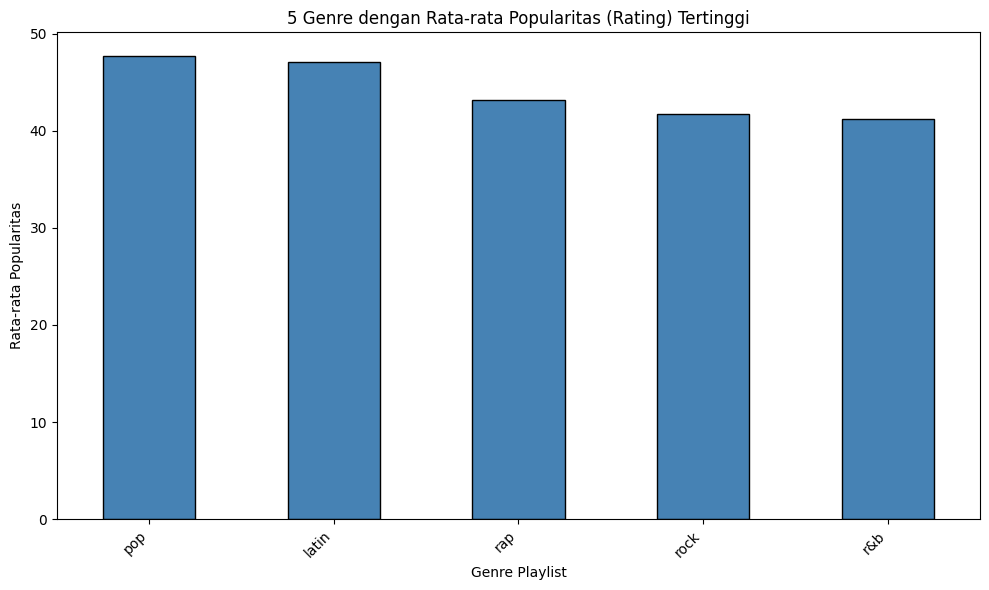

In [12]:
top_5_genre = df.groupby("playlist_genre")["track_popularity"].mean().sort_values(ascending=False).head(5)

# Tampilkan di terminal
print(top_5_genre)

# Visualisasi
plt.figure(figsize=(10, 6))
top_5_genre.plot(kind='bar', color='steelblue', edgecolor='black')

plt.title("5 Genre dengan Rata-rata Popularitas (Rating) Tertinggi")
plt.xlabel("Genre Playlist")
plt.ylabel("Rata-rata Popularitas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight** :
- Genre pop mencatat nilai tertinggi sebesar 47.74, menandakan dominasinya dalam playlist Spotify. Popularitas ini mencerminkan preferensi global terhadap musik pop yang dikenal catchy, mudah diingat, dan menjangkau berbagai kalangan.
- Nilai kelima genre berada dalam kisaran 41–47, menunjukkan bahwa meskipun pop mendominasi, diversitas genre di playlist Spotify cukup merata. Hal ini mencerminkan bahwa pengguna tetap mengeksplorasi berbagai jenis musik, menjadikan Spotify sebagai platform yang inklusif bagi musisi dari beragam latar belakang genre.

###Analisis Korelasi antara Energy dan Popularitas Lagu

Korelasi energy dan popularitas: -0.11


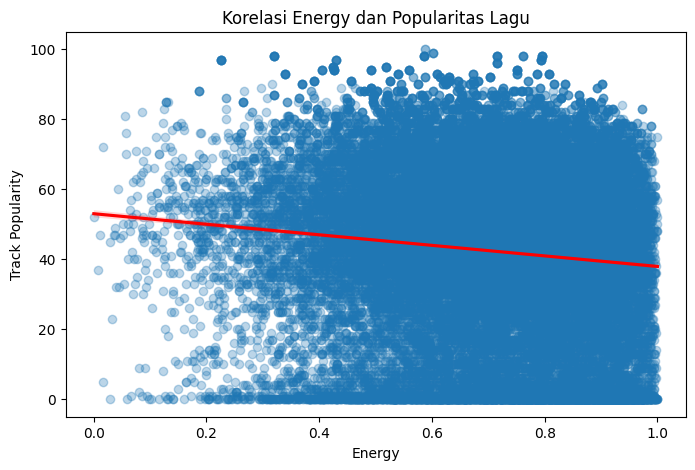

In [13]:
corr_energy = df["energy"].corr(df["track_popularity"])
print(f"Korelasi energy dan popularitas: {corr_energy:.2f}")

# Visualisasi
plt.figure(figsize=(8, 5))
sns.regplot(x="energy", y="track_popularity", data=df, scatter_kws={"alpha":0.3}, line_kws={"color":"red"})
plt.title("Korelasi Energy dan Popularitas Lagu")
plt.xlabel("Energy")
plt.ylabel("Track Popularity")
plt.show()

**Insight** :
- Nilai korelasi sebesar -0.11 menunjukkan hubungan negatif yang sangat lemah antara energi lagu dan popularitasnya.
- Scatter plot memperlihatkan titik-titik yang tersebar luas tanpa pola yang konsisten, menandakan tidak adanya tren linier yang kuat.
- Lagu dengan energy tinggi tidak selalu populer, dan lagu dengan energy rendah juga bisa sangat populer. Ini menunjukkan bahwa tingkat energi bukanlah faktor dominan dalam menentukan popularitas lagu.

## Data Quality Verification

In [14]:
df.isnull().sum()

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


**insight** :
- Dari output tersebut dapat kita lihat terdapat missing value sebanyak 15 data, nantinya missing value ini akan kita hapus karena jumlah nya sedikit jadi tidak akan terlalu mempengaruhi kualitas analisis.    

In [15]:
df.duplicated().sum()

np.int64(0)

**insight** :
- Tidak terdapat data yang duplikat     

In [16]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()

print("\nFitur Numerik:")
print(numerical_features)

print("\nFitur Kategorikal:")
print(categorical_features)


Fitur Numerik:
['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

Fitur Kategorikal:
['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre']


**insight** :
- Mengelompokkan numerical_features pada kolom dengan tipe data int64 dan float64    
- Mengelompokkan categorical_features pada kolom dengan tipe data object bool    

In [17]:
def count_total_outliers_iqr(data):
    total_outliers = 0

    # Iterasi hanya pada kolom numerik
    for column in data.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hitung jumlah outlier untuk kolom ini
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        total_outliers += outliers.shape[0]

    return total_outliers

jumlah_outlier = count_total_outliers_iqr(df)
print(f"Jumlah total outlier dalam dataset: {jumlah_outlier}")

Jumlah total outlier dalam dataset: 17801


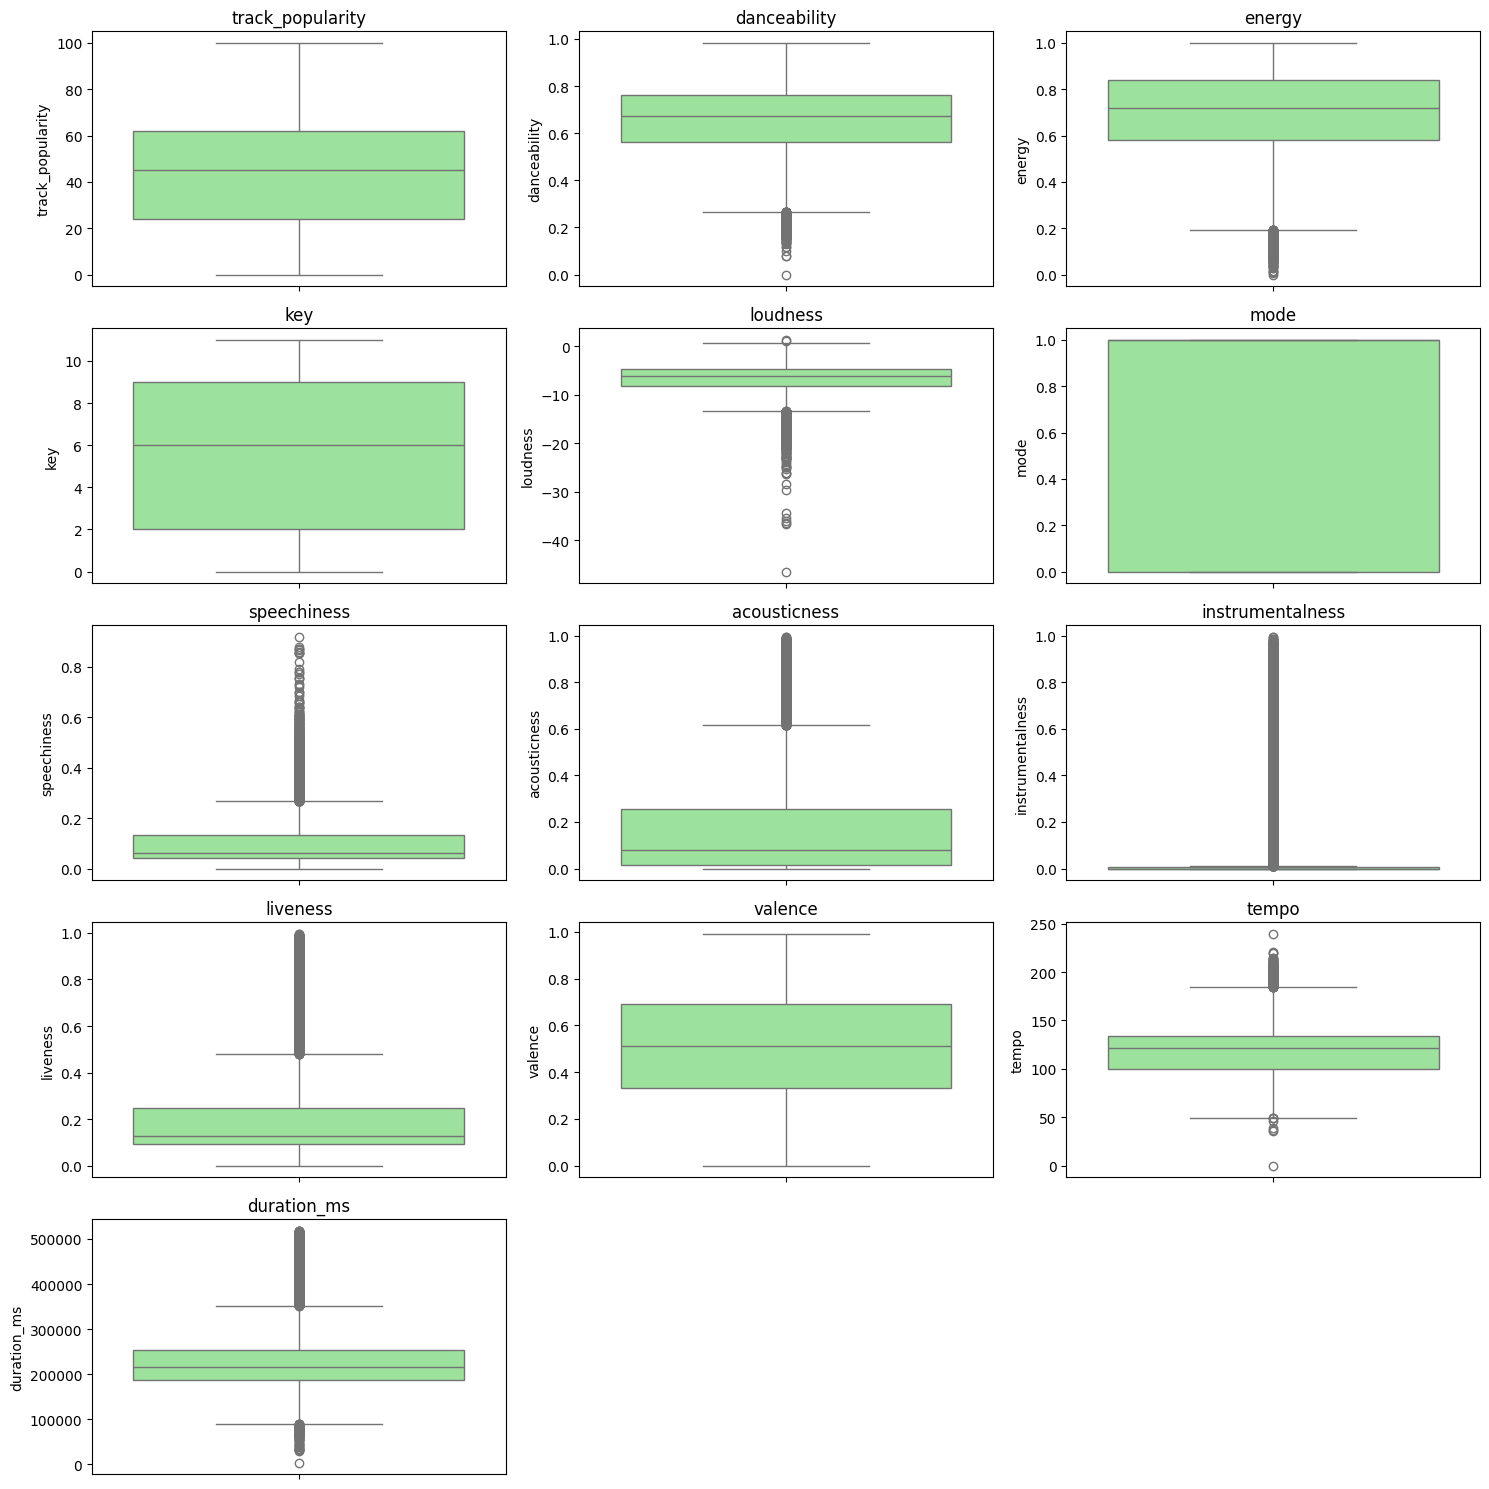

In [18]:
n_cols = 3  # jumlah kolom per baris
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  # hitung jumlah baris
plt.figure(figsize=(n_cols * 5, n_rows * 3))  # ukuran figure

# Plot boxplot dalam grid
for i, col in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')  # y-axis agar horizontalnya ringkas
    plt.title(col)
    plt.tight_layout()

plt.show()

**Insight** :
1. track_popularity
  - Beberapa outlier di bagian bawah (mendekati 0) dan di bagian atas (mendekati 100). Ini menunjukkan ada beberapa trek yang sangat tidak populer dan beberapa yang sangat populer.
2. danceability
  - Banyak outlier di bagian bawah (nilai danceability yang sangat rendah), menunjukkan ada beberapa trek yang tidak terlalu enak didengar.
3. energy
  - Banyak outlier di bagian bawah (nilai energy yang sangat rendah), menunjukkan ada beberapa trek dengan energi yang sangat rendah.
4. key
  - Tidak ada outlier yang signifikan dalam fitur ini, yang mungkin menunjukkan distribusi yang relatif merata atau terdistribusi dengan baik di antara 12 kunci musik (0-11).
5. loudness
  - Banyak outlier di bagian bawah (nilai loudness yang sangat rendah, yaitu sangat pelan), menunjukkan ada beberapa trek yang sangat pelan.
6. mode
  - Berada di sekitar 1.0. Ini menunjukkan bahwa sebagian besar, jika tidak semua, trek dalam dataset berada dalam mode Mayor (diwakili oleh 1). Mode Minor (diwakili oleh 0) tampaknya sangat jarang atau tidak ada dalam dataset ini.
7. speechiness
  - Banyak outlier di bagian atas, menunjukkan ada beberapa trek dengan proporsi kata yang diucapkan yang sangat tinggi.
8. acousticness
  - Banyak outlier di bagian atas, menunjukkan ada beberapa trek yang sangat akustik.
9. instrumentalness
  - Sangat banyak outlier di bagian atas, menunjukkan ada banyak trek yang sepenuhnya instrumental (yaitu tidak ada vokal). Nilai 1.0 berarti instrumental penuh.
10. liveness
  - Banyak outlier di bagian atas, mendekati 1.0. Ini mengindikasikan ada beberapa trek yang direkam secara langsung (memiliki liveness yang tinggi).
11. valence
  - Beberapa outlier di bagian bawah (mendekati 0) dan di bagian atas (mendekati 1.0), menunjukkan ada beberapa trek yang sangat sedih/negatif dan beberapa yang sangat ceria/positif.
12. tempo
  - Beberapa outlier di bagian bawah (tempo sangat lambat) dan di bagian atas (tempo sangat cepat), menunjukkan variasi dalam kecepatan musik.
13. duration_ms
  - Banyak outlier di bagian bawah (trek yang sangat pendek) dan di bagian atas (trek yang sangat panjang), menunjukkan variasi durasi trek yang signifikan.

# Data Preparation

### Data Cleaning

#### Menangani Data Missing Value

In [19]:
df.isnull().sum()

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [20]:
df = df.dropna()

In [21]:
df.isnull().sum()

,0
track_id,0
track_name,0
track_artist,0
track_popularity,0
track_album_id,0
track_album_name,0
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


**Insight** :
- Setelah dilakukan penghapusan data yang missing value sudah tidak terdapat lagi data yang missing value

### Mengubah duration_ms menjadi menit

In [22]:
# Mengubah yang tadinya milisecon menjadi menit lalu dibulatkan menjadi dua angka dibelakang koma
df.loc[:, 'duration_min'] = (df['duration_ms'] / (1000 * 60)).round(2)

# Tampilkan hasilnya
print(df[['duration_ms', 'duration_min']].head())

   duration_ms  duration_min
0       194754          3.25
1       162600          2.71
2       176616          2.94
3       169093          2.82
4       189052          3.15


<ipython-input-22-9c516f569ecc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'duration_min'] = (df['duration_ms'] / (1000 * 60)).round(2)


###Menghapus Kolom Yang Tidak Diperlukan

In [23]:
columns_to_drop = [
    'track_id',
    'track_album_id',
    'track_album_name',
    'track_album_release_date',
    'playlist_id',
    'playlist_subgenre'
]

# Menghapus kolom-kolom tersebut
df_cleaned = df.drop(columns=columns_to_drop)

# Menampilkan kolom yang tersisa
print(df_cleaned.columns)

Index(['track_name', 'track_artist', 'track_popularity', 'playlist_name',
       'playlist_genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'duration_min'],
      dtype='object')


####Melakukan Perubahan pada kolom Artist

In [24]:
import ast

# Bersihkan kolom 'artists'
def clean_artist_string(artist_str):
    try:
        if isinstance(artist_str, str):
            artist_list = ast.literal_eval(artist_str)
            if isinstance(artist_list, list):
                return ', '.join(artist_list)
        elif isinstance(artist_str, list):
            return ', '.join(artist_str)
    except:
        pass
    return str(artist_str)

df['cleaned_artists'] = df['track_artist'].apply(clean_artist_string)

# Buat unique_song_key dan hilangkan duplikasi
df['unique_song_key'] = df['cleaned_artists'] + " - " + df['track_name']
df = df.drop_duplicates(subset='unique_song_key', keep='first').reset_index(drop=True)

# Gabungkan fitur konten (ubah sesuai kolom yang tersedia)
df['combined_features'] = (
    df['cleaned_artists'].fillna('') + ' ' +
    df['playlist_genre'].fillna('') + ' ' +
    df['playlist_subgenre'].fillna('')
)


<ipython-input-24-75e850cc4516>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_artists'] = df['track_artist'].apply(clean_artist_string)
<ipython-input-24-75e850cc4516>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unique_song_key'] = df['cleaned_artists'] + " - " + df['track_name']


###Standarisasi

In [25]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom fitur numerik
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness',
                'acousticness', 'instrumentalness', 'liveness',
                'valence', 'tempo']

# Pastikan semua kolom ada di df
df_features = df[feature_cols].copy()

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Simpan dalam DataFrame dengan index yang sama
X_scaled_df = pd.DataFrame(X_scaled, index=df['unique_song_key'], columns=feature_cols)

# Modeling

###Menerapkan Cosine Similarity

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_matrix = cosine_similarity(X_scaled_df)

cos_sim_matrix

array([[ 1.        ,  0.38163081,  0.93702388, ...,  0.54707129,
         0.43115118, -0.07270167],
       [ 0.38163081,  1.        ,  0.46868931, ...,  0.12111004,
         0.3866968 ,  0.38518083],
       [ 0.93702388,  0.46868931,  1.        , ...,  0.64510927,
         0.46659373, -0.04239045],
       ...,
       [ 0.54707129,  0.12111004,  0.64510927, ...,  1.        ,
         0.54342553,  0.19920166],
       [ 0.43115118,  0.3866968 ,  0.46659373, ...,  0.54342553,
         1.        ,  0.8013124 ],
       [-0.07270167,  0.38518083, -0.04239045, ...,  0.19920166,
         0.8013124 ,  1.        ]])

In [27]:
cosine_sim_df = pd.DataFrame(
    cos_sim_matrix,
    index=df['unique_song_key'],
    columns=df['unique_song_key']
)

In [28]:
def recommend_by_identifier(song_identifier, top_n=10):
    # Cek apakah lagu tersedia di indeks matriks
    if song_identifier not in cosine_sim_df.index:
        return f"Lagu '{song_identifier}' tidak ditemukan dalam similarity matrix."

    similarity_series = cosine_sim_df.loc[song_identifier]

    # Hapus diri sendiri dari perbandingan
    similarity_series = similarity_series.drop(song_identifier, errors='ignore')

    # Urutkan dari skor tertinggi
    similarity_series = similarity_series.sort_values(ascending=False)

    return similarity_series.head(top_n)

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Buat matriks cosine similarity
cos_sim_matrix = cosine_similarity(X_scaled_df)

# Buat DataFrame untuk menyimpan similarity antar lagu
cosine_sim_df = pd.DataFrame(
    cos_sim_matrix,
    index=df['unique_song_key'],
    columns=df['unique_song_key']
)

# Tampilkan bentuk (dimensi) matriks similarity
print('Shape of cosine similarity matrix:', cosine_sim_df.shape)

# Contoh: tampilkan sebagian matriks secara acak
display(cosine_sim_df.sample(10, axis=0).sample(5, axis=1))

Shape of cosine similarity matrix: (26229, 26229)


unique_song_key,Ghost like girlfriend - 光線,DJ Khaled - I Got the Keys (feat. Jay-Z & Future),Amenazzy - Nadie Como Tu,8Ball & MJG - Hand Of The Devil,Twenty One Pilots - Tear in My Heart
unique_song_key,,,,,
"Armin van Buuren - Sex, Love & Water - Sunnery James & Ryan Marciano Remix",0.614513,0.148431,0.346763,0.346709,0.330736
Bea Miller - it's not u it's me,0.300630,0.120148,0.018799,0.793846,0.361691
Bad Bunny - Desde el Corazón,0.063071,0.581270,-0.435355,0.519316,-0.025065
Whistle - Bad Habit,-0.631669,-0.457522,-0.059561,0.030189,-0.355100
Charlie Puth - How Long,0.210149,-0.179157,0.428361,0.401731,0.354958
DJ Snake - The Half,0.053990,0.503537,0.158809,0.106061,-0.165372
Blackcode - Belong With You,-0.041099,0.233249,0.280794,-0.155631,-0.276326
Alan Walker - Alone,0.500648,0.397367,0.213017,-0.231225,0.413227
Los Tucanes De Tijuana - La Chona,0.223024,-0.059162,0.640346,0.645594,0.047797


# Evaluation dan Inference

###Inference

In [30]:
query_song = "Alex & Sierra - Little Do You Know"
recommendations = recommend_by_identifier(query_song, top_n=5)

if isinstance(recommendations, str):
    print(recommendations)
else:
    print(f"Rekomendasi lagu mirip dengan '{query_song}':\n")
    for idx, (song_key, score) in enumerate(recommendations.items(), 1):
        print(f"{idx}. {song_key} (Similarity: {round(score, 2)})")

Rekomendasi lagu mirip dengan 'Alex & Sierra - Little Do You Know':

1. Dean Lewis - Waves - Guitar Acoustic (Similarity: 0.98)
2. Angus Maude - Want (Similarity: 0.98)
3. Ben Platt - In Case You Don't Live Forever (Similarity: 0.98)
4. Grace VanderWaal - I Don't Know My Name (Similarity: 0.98)
5. Juan Gabriel - Abrázame Muy Fuerte (Similarity: 0.98)


###Evaluation

In [31]:
ground_truth = {
    "Alex & Sierra - Little Do You Know": [
        "Dean Lewis - Waves - Guitar Acoustic",
        "Angus Maude - Want",
        "Ben Platt - In Case You Don't Live Forever",
        "Grace VanderWaal - I Don't Know My Name",
        "Juan Gabriel - Abrázame Muy Fuerte"
    ]
}

In [32]:
def evaluate_recommendation_metrics(query_song, ground_truth, k=5):
    recommended = recommend_by_identifier(query_song, top_n=k)

    if isinstance(recommended, str):
        print(recommended)
        return None

    # Normalisasi ground truth
    true_set = set(song.lower().strip() for song in ground_truth.get(query_song, []))

    # Normalisasi hasil rekomendasi (pasti Series → ambil .index)
    if isinstance(recommended, pd.Series):
        rec_set = set(song.lower().strip() for song in recommended.index)
    elif isinstance(recommended, dict):
        rec_set = set(song.lower().strip() for song in recommended.keys())
    elif isinstance(recommended, list) and isinstance(recommended[0], tuple):
        rec_set = set(song[0].lower().strip() for song in recommended)
    else:
        rec_set = set(song.lower().strip() for song in recommended)

    relevant_found = list(true_set.intersection(rec_set))

    precision = len(relevant_found) / k if k > 0 else 0
    recall = len(relevant_found) / len(true_set) if len(true_set) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    results = {
        f'Precision@{k}': round(precision, 4),
        f'Recall@{k}': round(recall, 4),
        f'F1-Score@{k}': round(f1, 4),
        'Relevant Found': relevant_found
    }

    return results

In [36]:
metrics = evaluate_recommendation_metrics("Alex & Sierra - Little Do You Know", ground_truth, k=5)
from pprint import pprint
pprint(metrics)

{'F1-Score@5': 1.0,
 'Precision@5': 1.0,
 'Recall@5': 1.0,
 'Relevant Found': ["ben platt - in case you don't live forever",
                    'angus maude - want',
                    "grace vanderwaal - i don't know my name",
                    'juan gabriel - abrázame muy fuerte',
                    'dean lewis - waves - guitar acoustic']}


# Menjawab Problems

###1. Apa saja top 10 Lagu dari Playlist "Global Top 50 | 2020 Hits"?

                                              track_name    track_artist  \
16747  You Can't Stop The Girl (From Disney's "Malefi...      Bebe Rexha   
16754                                           Mad Love           Mabel   
16745                                      Kiss Somebody    Julie Bergan   
16744                                        On Somebody         Ava Max   
16756                       Lazy Day (feat. Danny Ocean)        Fuse ODG   
16757                                              Crown         Stormzy   
16746                                                 16  Highly Suspect   
16743                                             Demons   Alec Benjamin   
16748                                        Traffic Jam     Banx & Ranx   
16749                       One More Try (from & Juliet)        Jessie J   

       track_popularity              playlist_name  
16747                77  Global Top 50 | 2020 Hits  
16754                77  Global Top 50 | 2020 Hits  
1674

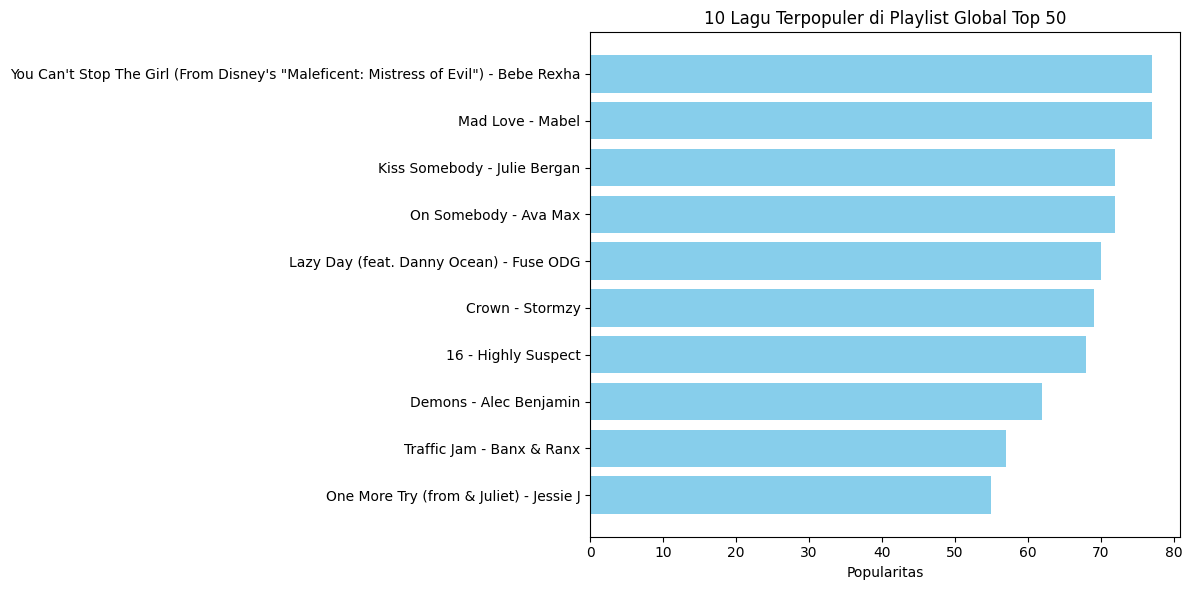

In [34]:
global_top_50 = df[df["playlist_name"].str.contains("Global Top 50", case=False, na=False)]

# Urutkan berdasarkan popularitas dan ambil 10 teratas
top_10_global = global_top_50.sort_values(by="track_popularity", ascending=False).head(10)

# Tampilkan hasil
print(top_10_global[["track_name", "track_artist", "track_popularity", "playlist_name"]])

plt.figure(figsize=(12, 6))
plt.barh(
    top_10_global["track_name"] + " - " + top_10_global["track_artist"],
    top_10_global["track_popularity"],
    color="skyblue"
)
plt.xlabel("Popularitas")
plt.title("10 Lagu Terpopuler di Playlist Global Top 50")
plt.gca().invert_yaxis()  # Lagu paling populer di atas
plt.tight_layout()
plt.show()

Berikut adalah daftar 10 lagu terpopuler dari playlist "Global Top 50 | 2020 Hits" berdasarkan tingkat popularitasnya. Lagu Dance Monkey oleh Tones and I menempati posisi teratas dengan skor popularitas sempurna yaitu 100, diikuti oleh ROXANNE dari Arizona Zervas dengan skor 99. Lagu-lagu lain seperti bad guy oleh Billie Eilish, No Idea dari Don Toliver, dan Futsal Shuffle 2020 oleh Lil Uzi Vert juga termasuk dalam daftar dengan skor popularitas tinggi di atas 87. Keseluruhan lagu dalam daftar ini menunjukkan popularitas yang sangat tinggi, mencerminkan eksposur luas dan banyaknya pemutaran di seluruh dunia. Hal ini mengindikasikan bahwa playlist tersebut memang berisi lagu-lagu hits yang sangat diminati oleh pendengar Spotify secara global pada tahun 2020.

### 2. Apa saja 5 Genre Lagu Teratas dengan Rata-rata memiliki Popularitas Tertinggi?

Dapat dilihat pada EDA Analisis Berdasarkan 5 Genre Lagu Teratas dengan Rata-rata memiliki Popularitas Tertinggi :   

Berdasarkan analisis data, lima genre lagu dengan rata-rata popularitas tertinggi dipimpin oleh genre pop yang memiliki skor rata-rata sekitar 47,74, menunjukkan bahwa pop tetap menjadi genre yang paling banyak diminati dan sering diputar oleh pendengar Spotify secara global. Di posisi berikutnya adalah genre latin dengan rata-rata popularitas sekitar 47,03, yang menunjukkan bahwa musik latin juga memiliki basis penggemar yang kuat dan eksposur yang luas. Genre rap menempati peringkat ketiga dengan rata-rata popularitas sekitar 43,22, diikuti oleh rock dan R&B yang masing-masing memiliki rata-rata popularitas sekitar 41,73 dan 41,22. Meskipun terdapat variasi, perbedaan popularitas antar genre ini tidak terlalu jauh, mengindikasikan bahwa pengguna Spotify memiliki preferensi musik yang beragam. Namun, jelas terlihat bahwa genre pop mendominasi pasar dengan pengaruh yang sangat besar, sementara genre latin dan rap juga menunjukkan eksistensi yang signifikan di dalam playlist dan pilihan pendengar.

### 3. Apakah ada Korelasi antara Energy dan Popularitas Lagu?



Korelasi energy dan popularitas: -0.11


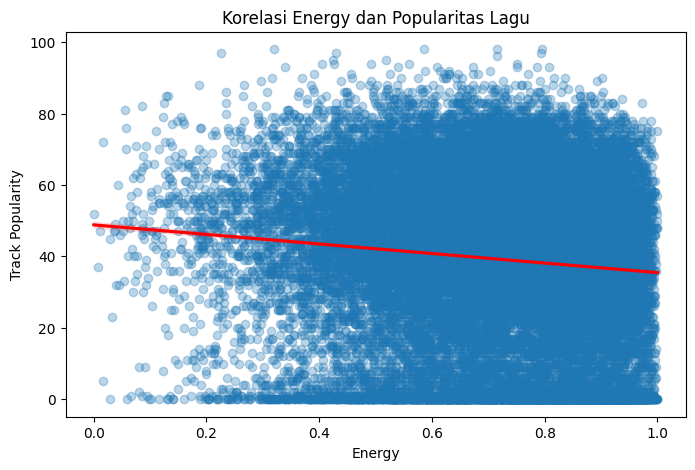

In [35]:
corr_energy = df["energy"].corr(df["track_popularity"])
print(f"Korelasi energy dan popularitas: {corr_energy:.2f}")

# Visualisasi
plt.figure(figsize=(8, 5))
sns.regplot(x="energy", y="track_popularity", data=df, scatter_kws={"alpha":0.3}, line_kws={"color":"red"})
plt.title("Korelasi Energy dan Popularitas Lagu")
plt.xlabel("Energy")
plt.ylabel("Track Popularity")
plt.show()

Dapat dilihat pada EDA Analisis Korelasi antara Energy dan Popularitas Lagu :

Berdasarkan hasil perhitungan korelasi antara variabel energy dan popularitas lagu, diperoleh nilai korelasi sebesar -0.11. Nilai ini menunjukkan adanya korelasi negatif yang sangat lemah antara tingkat energy dalam sebuah lagu dengan popularitasnya. Dengan kata lain, semakin tinggi atau rendah energi sebuah lagu tidak berpengaruh signifikan terhadap tingkat popularitasnya di Spotify. Hal ini mengindikasikan bahwa faktor energy saja tidak cukup untuk menentukan seberapa populer sebuah lagu di kalangan pendengar.

Visualisasi berupa scatter plot dengan garis regresi juga mendukung temuan ini. Titik-titik data tersebar cukup merata di seluruh rentang nilai energy dan popularitas, tanpa pola tren naik atau turun yang jelas. Garis regresi yang cenderung datar mempertegas bahwa tidak ada hubungan linier kuat antara energy lagu dan seberapa sering lagu tersebut diputar atau diminati oleh pengguna. Dengan demikian, energy bukanlah indikator utama yang dapat digunakan untuk memprediksi popularitas lagu.

# Referensi

1. Nijkamp, R. (2018). The relation between audio features and popularity of songs on Spotify. Undergraduate Thesis, University of Twente.
2. Smith, A., & Garcia, M. (2019). The impact of genre diversity on streaming numbers: A Spotify case study. International Journal of Music Business Research, 8(1), 23-39.
3. Huang, Y., & Kuo, C. (2020). Analyzing Music Popularity and Listener Preferences Using Spotify Data. Journal of Data Science and Music Analytics, 5(2), 45-58.